In [1]:
import pandas as pd 
from pprint import pprint
import seaborn as sns
# import warnings

import funciones as fun  # mis funciones

# 1 Carga de datos

Si tenemos alta volumetria de datos es bueno tener el tipo de dato más eficiente para el caso de uso.
Voy a intentar.
1. Eliminar simbolos que eviten numeros interpretarse adecuadamente.
2. Castear tipos de datos a formatos más adecuados para su uso y de ser posibles también más adecuados para su almacenamiento.
3. Validar que si existan duplicados en las tablas de catálogo.

## 1.1 Clientes

In [2]:
clientes = pd.read_excel('./data/maestro_clientes.xlsx', index_col=0)
clientes.sample()

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,ESTADO,DIVISION
572,1583,Young Yellow Baker,proveedor_2,SmallShop,Emarrus,NOROESTE


De inicio vamos a ver como se interpreta la informacion.

In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NUM TDA        2452 non-null   int64 
 1   NOMBRE DE TDA  2452 non-null   object
 2   CADENA         2452 non-null   object
 3   FORMATO        2452 non-null   object
 4   ESTADO         2452 non-null   object
 5   DIVISION       2452 non-null   object
dtypes: int64(1), object(5)
memory usage: 134.1+ KB


Para saber si nos conviene convertir los textos a categorize podemos contar cuantos valores unicos hay por tabla.

Por ejemplo, en una tabla de cientos de renglones podemos encontrar al rededor de 3 valores unicos en la columna de género: Femenino, Masculino, y Otros.

Si el número de valores unicos es pequeño es un buen indicador de que podemos transformar el tipo de dato a categoria, lo cual es más adecuado.

In [4]:
clientes.nunique()

NUM TDA          2448
NOMBRE DE TDA    2389
CADENA              2
FORMATO            13
ESTADO             32
DIVISION           11
dtype: int64

Esta parte la hacemos para buscar de manera rapida valores nulos que esten como texto porque aalgunas ocaciones los valores nulos están como: -9999, NA, 0000, -1, etc.

Cuando esto sucede los programas lo consideran un valor cuando en realidad no tiene significado.

In [5]:
_ = "DIVISION"
clientes[_].value_counts()

METRO-NORTE    349
OCCIDENTE      344
NORESTE        338
METRO-SUR      279
BAJÍO          257
CENTRO         237
SURESTE        222
NOROESTE       165
PENÍNSULA      103
CENTRO-SUR      91
SUROESTE        67
Name: DIVISION, dtype: int64

Ya que esta tabla corresponde a un catálogo no tiene mucho sentido tener valores duplicados

In [6]:
# Identificar posibles duplicados
clientes[clientes.duplicated(subset=["NUM TDA","CADENA"], keep=False)]

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,ESTADO,DIVISION
115,143,Empty Turquoise Baker,proveedor_1,Shop,Egusgul,NOROESTE
235,143,Empty Turquoise Baker,proveedor_1,Shop,Nabargus,OCCIDENTE
2409,2568,Impressive Coral BigCom,proveedor_2,Grocery,Mobartho,PENÍNSULA
2422,2568,Impressive Coral BigCom,proveedor_2,Grocery,Mobartho,PENÍNSULA


Para el TDA número **143** pareciera que el cliente se cambió de estado.
El TDA número **2568** parece que se repitio por alguna razor.

En el siguiente paso vamos a quedarnos con el último valor en ambos casos asumiendo que corresponde al valor más actualizado. De no hacerlo tendriamos un error al unir la tabla de ventas a esta porque tenemos que usar el `NUM TDA`

### 1.1.1 Correcciones

La tabla `clientes` valores nulos aparentes. Los cambios que podriamos hacer son para mejorar el tipo de datos.
1. Aqui `NUM TDA` parece ser la unica columna numerica. Vamos a hacer un downcast de sus valores.
2. Las demás columnas pueden ser catalogos
3. Quitar los duplicados

In [7]:
clientes = fun.downcaster(clientes)  # Hace más pequeño el espacio que ocupa en memoria.

In [8]:
# Cambia las columnas seleccionadas a categorias
_obj_cols = clientes.select_dtypes("O").columns  # Selecciona las columnas
clientes = fun.to_categorical(clientes, _obj_cols)  # Combiertelas a dato de categoria

In [9]:
# Quitar duplicados
clientes.drop_duplicates(
    subset=["NUM TDA","CADENA"],
    keep="last",
    inplace=True,
    ignore_index=False  # Para que el index nos sirva de referencia al index del archivo original
)

In [10]:
clientes.info()  # Revisamos el resultado final para esta DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450 entries, 0 to 2451
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   NUM TDA        2450 non-null   int16   
 1   NOMBRE DE TDA  2450 non-null   category
 2   CADENA         2450 non-null   category
 3   FORMATO        2450 non-null   category
 4   ESTADO         2450 non-null   category
 5   DIVISION       2450 non-null   category
dtypes: category(5), int16(1)
memory usage: 123.9 KB


## 1.2 Productos

De nueva cuenta vamos a revisar los 3 puntos anteriores:

1. Eliminar simbolos que eviten numeros interpretarse adecuadamente.
2. Convertir tipos de datos a formatos más adecuados para su uso y de ser posibles también más adecuados para su almacenamiento.
3. Validar que si existan duplicados en las tablas de catálogo.

In [11]:
# Leemos los datos
productos = pd.read_csv('./data/maestro_productos.csv', index_col=0)
productos.sample()

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
33,347635,Frosted Banana Choc-Chip,Sugar-free,Cereal bars


In [12]:
productos.info()  # Vemos como se están cargando y si hay nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sku              1242 non-null   int64 
 1   Sku_Description  1242 non-null   object
 2   Sku_Category     1242 non-null   object
 3   Sku_Subcategory  1242 non-null   object
dtypes: int64(1), object(3)
memory usage: 48.5+ KB


De nuevo vamos a contar cuantos valores unicos tenemos para saber si es posible convertir algunos a categorias.

Para este catálogo si es posible convertir:
Sku_Category, Sku_Subcategory ya que son presisamente categorias son pocos valores diferentes. Al contrario de la descripcion que dejaremos como esta.

In [13]:
productos.nunique()

Sku                1242
Sku_Description    1242
Sku_Category          2
Sku_Subcategory       3
dtype: int64

La siguiente parte la hacemos para buscar de manera rapida valores nulos que esten como texto porque algunas ocaciones los valores nulos están como: -9999, NA, 0000, -1, etc.

Cuando esto sucede generalmente son muy notorios y se observan facilmente calculando la frecuencia con que aparece cada valor.

In [14]:
_ = "Sku_Description"
productos[_].value_counts()

Frosted Mango                       1
Frosted cherry                      1
Peanut Butter cherry                1
Sugar cherry                        1
Graham cherry                       1
                                   ..
Fruit & Bran Chocolate              1
Double Dip Crunch Chocolate         1
Crunchy Nut Cornflakes Chocolate    1
Crunchy Bran Chocolate              1
Gorilla Chilifest Chocolate         1
Name: Sku_Description, Length: 1242, dtype: int64

In [15]:
# Identificar posibles duplicados
productos[productos.duplicated(subset=["Sku"], keep=False)]

,Sku,Sku_Description,Sku_Category,Sku_Subcategory


¡Perfecto, no tiene duplicados!

### 1.2.1 Correcciones

Los datos para `productos` no traen valores nulos.

Podriamos mejorar el tipo de dato:
1. Reduciendo el tipo de dato numerico a alguno que ocupe menos espacio.
2. Cambiando texto por categorias

In [16]:
productos = fun.downcaster(productos)  # busca reducir tipos de datos numericos a unos mas ligeros

Ya que esta tabla corresponde a un catálogo no deberia tener valores duplicados, esta tabla no los tiene lo cual es muy bueno.

In [17]:
# Cambia las columnas seleccionadas a categorias
_obj_cols = ["Sku_Category", "Sku_Subcategory"]  # Selecciona las columnas
productos = fun.to_categorical(productos, _obj_cols)  # Conviertelas a dato de categoria

In [18]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sku              1242 non-null   int32   
 1   Sku_Description  1242 non-null   object  
 2   Sku_Category     1242 non-null   category
 3   Sku_Subcategory  1242 non-null   category
dtypes: category(2), int32(1), object(1)
memory usage: 26.9+ KB


## 1.3 Proveedores

Tenemos dos archivos de proveedores, vamos a juntarlos en uno solo.

Aunque parece ser del mismo proveedor, pero de años diferentes, voy a tratarlos como si fueran proveedores distintos a falta de mayor informacion del negocio.

### 1.3.1 Proveedor 1

Para los datos del archivo de proveedor 1 revisemos que las columnas se interpreten de manera adecuada segun su tipo de dato. Y de ser posible también intentemos reducir su espacio en memoria como lo hemos hecho antes.

In [19]:
proveedor_1 = pd.read_csv('./data/sellout-proveedor1.csv.gz',compression = 'gzip',sep = '|')
proveedor_1.sample(3)

,Sku,Date,Store_Id,Units,Price
1023288,4769520,2017-05-20 SO Diaria Piezas,668,0.4,59.0


In [21]:
proveedor_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206365 entries, 0 to 1206364
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Sku       1206365 non-null  int64         
 1   Date      1206365 non-null  datetime64[ns]
 2   Store_Id  1206365 non-null  int64         
 3   Units     1206365 non-null  float64       
 4   Price     1206365 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 46.0 MB


Listo, la fecha se esta interpretando en su formato correcto que es datetime.

In [22]:
proveedor_1.nunique()

Sku           43
Date         155
Store_Id     241
Units       2166
Price       6946
dtype: int64

#### Correcciones para proveedor 1

Para los datos de **Proveedor 1** tenemos que hacer 2 cambios:
1. Agregar la columna de proveedor, para que al juntar las tablas de proveedores podamos distinguir de que proveedor viene.
2. `Date` tiene un texto adicional que podemos eliminar para que se pueda reconocer como fecha.
    - la fecha está separada por guiones, pero tiene un extra que vamos a agregar al formato.
    <br> Esto quiere decir que la fecha tiene el formato `'%Y-%m-%d SO Diaria Piezas'`

In [23]:
proveedor_1=proveedor_1.assign(proveedor=1)  # Agregamos el indicador de proveedor

In [20]:
# Corregimos la fecha
proveedor_1["Date"] = pd.to_datetime(proveedor_1['Date'],
                                     format= '%Y-%m-%d SO Diaria Piezas')

In [24]:
proveedor_1 = fun.downcaster(proveedor_1)  # hacemos los datos numericos más ligeros.

Estas son todas las modificaciones necesarias hasta el momento. No parece necesario cambiar.

Observamos que las transacciones de este set de datos son durante 2017.
- Inicia en 2017
- Termina a mediados del mismo 2017.

In [25]:
proveedor_1.describe(include='datetime')

/tmp/ipykernel_1541/1504330057.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  proveedor_1.describe(include='datetime')


,Date
count,1206365
unique,155
top,2017-01-01 00:00:00
freq,7783
first,2017-01-01 00:00:00
last,2017-06-04 00:00:00


Validamos el resultado

In [26]:
proveedor_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206365 entries, 0 to 1206364
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sku        1206365 non-null  int32         
 1   Date       1206365 non-null  datetime64[ns]
 2   Store_Id   1206365 non-null  int16         
 3   Units      1206365 non-null  float32       
 4   Price      1206365 non-null  float32       
 5   proveedor  1206365 non-null  int8          
dtypes: datetime64[ns](1), float32(2), int16(1), int32(1), int8(1)
memory usage: 26.5 MB


### 1.3.2 Proveedor 2

Similar a lo que hicimos con Proveedor 1, vamos a tener los siguientes ajustes:
- Ya que vamos a unir los datos, agregaremos una columna con el indicador de proveedor, para que al juntar las tablas a cuál proveedor corresponde cada transaccion.

Tenemos que hacer validaciones para saber que la informacion va a empatar correctamente entre las dos tablas.

In [27]:
proveedor_2 = pd.read_csv('./data/sellout-proveedor2.csv.gz',compression = 'gzip',sep = '|')
proveedor_2.sample()

,Sku,Date,Store_Id,Pieces,Price
4288926,4645560,2016/02/20,1015,0.5,$6.50


In [28]:
proveedor_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862029 entries, 0 to 4862028
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Sku       int64  
 1   Date      object 
 2   Store_Id  int64  
 3   Pieces    float64
 4   Price     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 185.5+ MB


In [29]:
proveedor_2.nunique()

Sku           33
Date         242
Store_Id    2085
Pieces      3101
Price       3401
dtype: int64

#### Correcciones para proveedor 2

Para los datos de proveedor 2 vamos a arreglar 4 cosas para que las columnas esten en el tipo de dato correcto:
1. Agregar la columna de proveedor, para que al juntar las tablas de proveedores podamos distinguir a quien corresponde.
2. Renombrar la columna `Pieces` a `Units` para que coincida con las columnas de **Proveedor 1**
3. De `Price` vamos a eliminar el simbolo de moneda `$` para entonces interpretar el dato como un número.
4. Interpretar
5. la fecha con el formato correcto.
    - La fecha para proveedor 2 está en formato `'%Y/%m/%d'`
6. Después vamos a intentar reducir los valores numericos como lo hemos hecho antes con la funcion `downcaster`

In [30]:
proveedor_2=proveedor_2.assign(proveedor=2)

In [31]:
# Renombrar columna
proveedor_2.rename(
    {'Pieces':'Units'},
    axis = 'columns',
    inplace=True
)

In [32]:
# Quitar el simbolo de moneda $ de "Price" para poderlo interpretar como un número
proveedor_2['Price'] = proveedor_2['Price'].str.replace('$','').astype(float)

/tmp/ipykernel_1541/44012814.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  proveedor_2['Price'] = proveedor_2['Price'].str.replace('$','').astype(float)


In [33]:
proveedor_2['Date'] = pd.to_datetime(proveedor_2['Date'],
                                     format = '%Y/%m/%d')

In [34]:
proveedor_2 = fun.downcaster(proveedor_2)

In [35]:
proveedor_2.describe(include='datetime')

/tmp/ipykernel_1541/2620815600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  proveedor_2.describe(include='datetime')


,Date
count,4862029
unique,242
top,2016-12-04 00:00:00
freq,23225
first,2016-01-01 00:00:00
last,2016-12-30 00:00:00


Inicia junto con el 2016, y termina el 30 de diciembre. Al parecer descansaron para año nuevo.

In [36]:
proveedor_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862029 entries, 0 to 4862028
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Sku        int32         
 1   Date       datetime64[ns]
 2   Store_Id   int16         
 3   Units      float32       
 4   Price      float32       
 5   proveedor  int8          
dtypes: datetime64[ns](1), float32(2), int16(1), int32(1), int8(1)
memory usage: 106.6 MB


### 1.3.3 Unir los datos de proveedores 1 y 2

Parte de la solicitud es tener un dataset de proveedores, para esto es necesario juntar las dos tiendas en una sola.

Una vez que corregimos los nombres de columnas y eliminamos simbolos no necesarios podemos hacer esto facilmente.

In [37]:
ventas = pd.concat(objs=[proveedor_1,
                         proveedor_2],
                 axis=0,
                 ignore_index=True) # ignorar el índice es bueno para no tener índices repetidos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068394 entries, 0 to 6068393
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Sku        int32         
 1   Date       datetime64[ns]
 2   Store_Id   int16         
 3   Units      float32       
 4   Price      float32       
 5   proveedor  int8          
dtypes: datetime64[ns](1), float32(2), int16(1), int32(1), int8(1)
memory usage: 133.1 MB


# 2 Calidad de datos

Puntos importantes a tener en cuenta respecto a la calidad de datos:

- Estos datos deben tener **ventas para todos los productos** del catálogo de productos.
- Estos datos deben cubrir las **ventas en todo el país** de dos grupos de supermercados.
- Estos datos deben tener **ventas diarias por producto**.

## 2.1 Ventas para todos los productos

In [38]:
productos_vendidos = set(ventas["Sku"].unique())
catalogo_de_productos = set(productos["Sku"].unique())
sku_sin_ventas = catalogo_de_productos-productos_vendidos
print(len(sku_sin_ventas), "productos sin ventas")
print(f"{len(sku_sin_ventas)/len(catalogo_de_productos):.2%} de un total de {len(catalogo_de_productos)}")

1195 productos sin ventas
96.22% de un total de 1242


## 2.2 Ventas para todo el pais en cada supermercado

Cuando revise los documentos note que hay algunos detalles en los datos:
1. 0 en el valor de precio y/o piezas
2. Fracciones de pieza: Piezas que no tienen un valor entero
3. Sin clientes: Existen entradas de Store_Id que no están en ninguna entrada de clientes.

In [39]:
# Ventas con informacion de clientes
ventas_clientes = ventas.merge(clientes,
                               how='right', left_on="Store_Id", right_on="NUM TDA",
                               sort=False, suffixes=('_x', '_y')
                              )
ventas_clientes

,Sku,Date,Store_Id,Units,Price,proveedor,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,ESTADO,DIVISION
0,4240039.0,2017-01-01,2.0,10.0,16.799999,1.0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
1,4240039.0,2017-01-02,2.0,43.0,16.799999,1.0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
2,4240039.0,2017-01-03,2.0,33.0,16.799999,1.0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
3,4240039.0,2017-01-04,2.0,15.0,16.799999,1.0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
4,4240039.0,2017-01-05,2.0,21.0,16.799999,1.0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
...,...,...,...,...,...,...,...,...,...,...,...,...
6046291,4442378.0,2016-12-27,1364.0,3.0,13.450000,2.0,1364,Legendary Blue AllInOne,proveedor_2,TinyShop,Gulvitval,NORESTE
6046292,4442378.0,2016-12-28,1364.0,2.0,13.450000,2.0,1364,Legendary Blue AllInOne,proveedor_2,TinyShop,Gulvitval,NORESTE
6046293,4442378.0,2016-12-29,1364.0,10.0,13.450000,2.0,1364,Legendary Blue AllInOne,proveedor_2,TinyShop,Gulvitval,NORESTE
6046294,4442378.0,2016-12-30,1364.0,5.0,13.450000,2.0,1364,Legendary Blue AllInOne,proveedor_2,TinyShop,Gulvitval,NORESTE


Crearemos dos filtros para que sea más facil buscar la informacion de tiendas con/sin ventas.

In [40]:
mask_tiendas_sin_ventas=ventas_clientes.isnull().sum(axis=1)!=0
mask_tiendas_con_ventas=~mask_tiendas_sin_ventas

Vamos a guardar los `NUM TDA` de las tiendas sin ventas

In [41]:
tiendas_sin_ventas = set(ventas_clientes[mask_tiendas_sin_ventas]["NUM TDA"].unique())
tiendas_con_ventas = set(ventas_clientes[mask_tiendas_con_ventas]["NUM TDA"].unique())

In [42]:
# understanding check
len(tiendas_sin_ventas-tiendas_con_ventas)==len(tiendas_sin_ventas)

True

Revisamos que todos los estados tengan ventas

In [43]:
estado_sin_ventas = set(ventas_clientes[mask_tiendas_sin_ventas]["ESTADO"].unique())
estado_con_ventas = set(ventas_clientes[mask_tiendas_con_ventas]["ESTADO"].unique())

estado_sin_ventas-estado_con_ventas

set()

Revisamos que cada division tenga ventas, asumiendo que los nombres de las divisiones no se repiten en diferentes estados

In [44]:
division_sin_ventas = set(ventas_clientes[mask_tiendas_sin_ventas]["DIVISION"].unique())
division_con_ventas = set(ventas_clientes[mask_tiendas_con_ventas]["DIVISION"].unique())

division_sin_ventas-division_con_ventas

set()

Encontramos tiendas que no tienen ventas, y en un overview no parece que sea alguna generalidad de estado o division. Más bien son casos aislados dentro de estas subcategorias.

## 2.3 Ventas diarias por producto

Ya que no tengo mayor informacion del reglas de negocio hare 2 cosas para validar esto.
1. Validar el número de ventas por periodo
2. Revisar la distancia entre periodos

Con esto podremos saber si los periodos están completos.

> Voy a hacer esto por proveedor para no asumir que son el mismo proveedor y para identificar posibles errores de cada dataset más claramente

### 2.3.1 Proveedor 1

In [45]:
n_ventas_por_fecha_proveedor1=proveedor_1["Date"].sort_values().value_counts()
n_ventas_por_fecha_proveedor1

2017-01-01    7783
2017-04-17    7783
2017-04-10    7783
2017-04-11    7783
2017-04-12    7783
              ... 
2017-02-22    7783
2017-02-23    7783
2017-02-24    7783
2017-02-25    7783
2017-06-04    7783
Name: Date, Length: 155, dtype: int64

Llama la atencion que tenga el mismo número de ventas todos los dias aunque si esperariamos algo uniforme.

<AxesSubplot:>

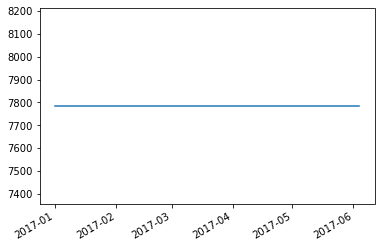

In [46]:
n_ventas_por_fecha_proveedor1.plot()

Supongamos que esto fue por como se generaron los datos.

Ahora vamos a revisar que todos los meses tengan datos para cada uno de sus dias.

In [47]:
l = list(
    map(
        lambda t: t.strftime('%Y-%m_%B')+f" ({t.daysinmonth})",
        pd.to_datetime(proveedor_1['Date'].unique())
    )
)

pprint({x:l.count(x) for x in set(l)})

{'2017-01_January (31)': 31,
 '2017-02_February (28)': 28,
 '2017-03_March (31)': 31,
 '2017-04_April (30)': 30,
 '2017-05_May (31)': 31,
 '2017-06_June (30)': 4}


<AxesSubplot:>

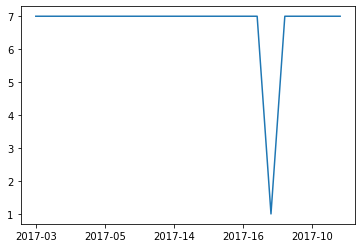

In [48]:
l = list(
    map(
        lambda t: t.strftime('%Y-%U'),
        pd.to_datetime(proveedor_1['Date'].unique())
    )
)
count_per_week_of_year = pd.Series({x:l.count(x) for x in set(l)})
count_per_week_of_year.plot()

Parece que proveedor 1 comenzo junto con el año en 2017

| Año  | mes   | detalles                                                     |
| ---- | ----- | ------------------------------------------------------------ |
| 2017 | Junio | Es el corte de los datos podría ser que el mes "aun no terminaba" cuando se creo el dataset. |

### 2.3.2 Proveedor 2

<AxesSubplot:>

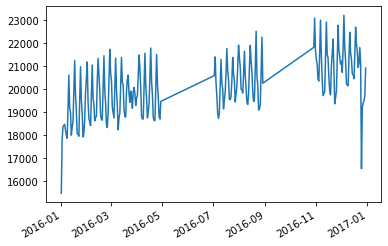

In [49]:
ventas[ventas["proveedor"]==2]["Date"].sort_values().value_counts().plot()

Podemos observar que tiene saltos en la informacion en rangos muy distantes. ¿Por qué?

Revisemos en que meses faltan datos comparando cuantos dias tiene el mes contra los dias que tuvo informacion.

In [50]:
l = list(
    map(
        lambda t: t.strftime('%Y-%m_%B')+f" ({t.daysinmonth})",
        pd.to_datetime(proveedor_2['Date'].unique())
    )
)

pprint({x:l.count(x) for x in set(l)})

{'2016-01_January (31)': 31,
 '2016-02_February (29)': 29,
 '2016-03_March (31)': 31,
 '2016-04_April (30)': 29,
 '2016-07_July (31)': 30,
 '2016-08_August (31)': 29,
 '2016-10_October (31)': 3,
 '2016-11_November (30)': 30,
 '2016-12_December (31)': 30}


<AxesSubplot:>

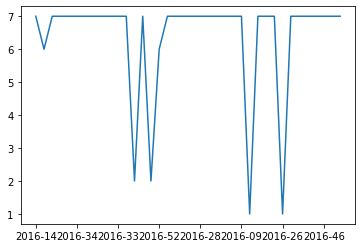

In [51]:
l = list(
    map(
        lambda t: t.strftime('%Y-%U'),
        pd.to_datetime(proveedor_2['Date'].unique())
    )
)
count_per_week_of_year = pd.Series({x:l.count(x) for x in set(l)})
count_per_week_of_year.plot()

No todos los meses tienen datos completos.

| Año  | mes        | detalles                                                     |
| ---- | ---------- | ------------------------------------------------------------ |
| 2016 | Abril      | Falta un dia                                                 |
| 2016 | July       | Falta un dia                                                 |
| 2016 | Agosto     | Faltan 2 dias, seria conveniente saber porque                |
| 2016 | Septiembre | Falta el mes completo                                        |
| 2016 | Octubre    | solo tiene 3 dias. Seguramente hay un error                  |
| 2016 | Diciembre  | Falta el 31 de diciembre. Posiblemente cerraron por ser dia festivo   |

In [52]:
count_per_week_of_year.index.max()

'2016-52'

In [53]:
count_per_week_of_year[count_per_week_of_year!=7]

2016-17    6
2016-35    2
2016-00    2
2016-52    6
2016-43    1
2016-26    1
dtype: int64

Esta lista de semanas nos puede ayudar a comunicarnos con el cliente para obtener más informacion.

## 2.4 Adicionales

### 2.4.1 Precio y piezas


Algunas ventas en  `Price` y `Units` tienen valores menor o igual a 0

Es posible que estos productos esten descontinuados, tengan descuento o sean errores, vamos a explorarlos un poco para poder preguntarle al cliente directamente.

In [54]:
# Hay algunas filas con precio 0 y piezas 0, esto probablemente es un error.
mask_descontinuados = (ventas['Price']==0) & (ventas['Units'] == 0)  # Revisa que columnas tiene precio = 0 y piezas = 0
descontinuados = ventas[mask_descontinuados]
sku_descontinuados = set(ventas[mask_descontinuados].Sku.unique())

print(len(descontinuados), "Sin precio ni piezas")

568002 Sin precio ni piezas


La siguiente celda es para saber cuantos corresponden a cada proveedor y vemos que todos son del proveedor 1.

In [55]:
descontinuados.proveedor.value_counts()

1    568002
Name: proveedor, dtype: int64

In [56]:
len(sku_descontinuados)/len(set(ventas.Sku.unique()))

0.8958333333333334

89.6% de los distintos productos están afectados con esta caracteristica de que no tuvieron precio ni piezas en algún momento. Quiza no están descontinuados como lo pense en un inicio, es posible que debido a su movimiento se lleguen a agotar cuando sé de un descuento.

Aun asi podriamos revisar en que fechas es para saber si se agrupan en periodos promocionales además de hablar con el cliente para entender esto.

In [57]:
ventas[ventas.Sku.isin(sku_descontinuados) & ventas.proveedor==1].groupby("Store_Id").agg({
    "Price":["mean","count", "min","max"],
    "Units":["mean","count", "min","max"]
})

Price                                   Units              \
               mean count        min         max       mean count   min   
Store_Id                                                                  
2         14.780826  4805   0.000000   80.500000  16.975296  4805  0.00   
4         14.699944  5270   0.000000  102.760002  38.591671  5270 -0.45   
5         14.783179  5115  -3.600000   86.155556  28.329414  5115 -0.75   
6         17.066229  5270   0.000000   80.522224  35.289753  5270  0.00   
7         14.470395  5115 -24.200001   67.000000  34.118610  5115  0.00   
...             ...   ...        ...         ...        ...   ...   ...   
707       14.517314  3100   0.000000   59.555557   1.612581  3100  0.00   
708       13.663567  4185   0.000000   80.449997  10.745556  4185  0.00   
709        6.545716  4340   0.000000   59.599998   0.874816  4340  0.00   
711        0.000000   155   0.000000    0.000000   0.000000   155  0.00   
712        5.778435  2790   0.000000   59.555557   1.569459  2790  0.00   

                  
             max  
Store_Id          
2          548.0  
4         1236.0  
5         1403.0  
6         2086.0  
7         2519.0  
...          ...  
707         24.0  
708        601.0  
709         32.0  
711          0.0  
712         89.0  

[241 rows x 8 columns]

Vemos que tanto para `Price` como para `Units` tenemos valores negaivos y en cero. Sería importante saber que causa esto.

Otro analisis que se puede hacer es por fechas porque quisa son descuentos, o con un detector de anomalias, pero creo que está fuera del scope de esta prueba. En este punto sería más conveniente platicar con el ciente para entender al negocio con mayor claridad.

Finalmente, vamos a tomar un conteo de las ventas sin costo, que bien podrian ser bajas por merma o productos regalados.

In [58]:
# Hay algunas filas con precio 0 y piezas 0, esto probablemente es un error.
mask_sin_costo = (ventas['Price']==0) & (ventas['Units'] != 0)  # Revisa que columnas tiene precio = 0 y piezas = 0
sin_costo = ventas[mask_sin_costo]
print(len(sin_costo), "Ventas precio")

110 Ventas precio


Revisemos a que proveedor corresponden. Aqui muestra que las 110 ventas com precio de $0 son del proveedor 1.

In [59]:
sin_costo.proveedor.value_counts()

1    110
Name: proveedor, dtype: int64

In [60]:
ventas_sin_costo = ventas[~mask_sin_costo]

# Validamos que la cantidad de datos corresponda a la cantidad que se debio quitar
assert len(ventas)==(len(ventas_sin_costo) + sum(mask_sin_costo)), "Missing data"

print("original", len(ventas))
print("Ventas sin ", len(ventas_sin_costo))

print("Datos removidos: {proportion:.3%}".format(proportion=sum(mask_sin_costo)/len(ventas_sin_costo)))

original 6068394
Ventas sin  6068284
Datos removidos: 0.002%


> Es importante confirmar con el cliente la causa de que esten en 0 estos campos.

### 2.4.2 Fracciones de piezas.
Otro posible problema es entradas en la columna piezas que no son enteros, lo cual es un posible error.
Estos representan casi la mitad de todas las entradas en la tabla de ventas.

In [63]:
mask_pieces = ventas['Units'] != ventas['Units'].astype(int)

print(sum(mask_pieces), ' son entradas con una fracción en "Units"')
print(f"Un {sum(mask_pieces)/len(ventas):.2%} de los datos")

2397582  son entradas con una fracción en "Units"
Un 39.51% de los datos


Me interesa saber que tipo de producto es el que está fraccionado. Porque si son Kilos de fruta es entendible, pero si fuera un producto que solo se vende entero habría que preguntarnos ¿Por qué?

In [64]:
# En caso de que esas entradas se consideren un error se puede ocupar esta tabla.
fracciones_de_ventas = ventas[mask_pieces].merge(productos, on="Sku")
fracciones_de_ventas.sample(10)

,Sku,Date,Store_Id,Units,Price,proveedor,Sku_Description,Sku_Category,Sku_Subcategory
2062855,4290336,2016-03-10,3625,0.45,21.500000,2,Toast Chocolate,Super-flavour,Cereal box
877927,4604976,2016-03-07,3144,0.75,6.400000,2,Squares Mango Peach,Sugar-free,Cereal bars
109384,4412040,2016-02-08,1181,0.50,5.000000,2,Crispy Rice Mango Peach,Sugar-free,Cereal bars
358762,4523924,2016-12-15,1036,0.20,10.800000,2,Grape-Nuts Mango Peach,Super-flavour,Cereal box
1126219,4645560,2016-02-22,2180,1.50,6.500000,2,Nut Cheerios Chocolate Choc Chip,Sugar-free,Cereal bars
24651,4412040,2017-02-24,108,0.50,25.200001,1,Crispy Rice Mango Peach,Sugar-free,Cereal bars
1672120,4270121,2016-11-07,1910,0.20,10.200000,2,Squares Chocolate,Super-flavour,Cereal box
1087117,4625287,2016-08-13,1921,1.50,5.900000,2,Toast Mango Peach,Super-flavour,Cereal box
758026,4543948,2016-12-19,3098,13.50,40.000000,2,Puffs Mango Peach,Super-flavour,Cereal box
2382807,4300343,2016-08-11,3857,18.90,38.599998,2,Frosted Mango Peach,Super-flavour,Cereal box


¿Cuál es la descripcion de los productos con fracciones?

In [65]:
fracciones_de_ventas.Sku_Description.value_counts()

Toast Chocolate                               286999
Squares Chocolate                             246541
Cups Mango Peach                              224276
Frosted Mango Peach                           202448
Grape-Nuts Mango Peach                        201434
Crispy Rice Mango Peach                       195404
Crunch Chocolate Choc Chip                    190382
MultiGrain Chocolate Choc Chip                178070
Toast Mango Peach                             176672
Squares Mango Peach                           101486
Puffs Mango Peach                              87066
Nut Cheerios Chocolate Choc Chip               52418
Sugar Chocolate Choc Chip                      50089
Cornflakes Mango Peach                         47744
Crunch Berries Mango Peach                     44162
Crunchy Bran Chocolate Choc Chip               25856
Cornflakes Chocolate Choc Chip                 22006
Crunchy Nut Cornflakes Chocolate Choc Chip     19433
Graham Mango Peach                            

¿A que subcategoria de los productos corresponden?

In [66]:
fracciones_de_ventas.Sku_Category.value_counts()

Super-flavour    1916552
Sugar-free        481030
Name: Sku_Category, dtype: int64

¿Por qué tenemos fracciones de cajas de cereales?